In [77]:
import pandas as pd 
df = pd.read_csv("state_data.csv")

In [78]:
df.shape

(52, 4)

In [79]:
#4) 4 columns, 52 rows
df.head(), df.tail()
#5a) State initials, latitude, longitude, and State name
#5b) Alaska
#5c) Wyoming
#5d) 52
#5e) Includes Puerto Rico and D.C.

(  state   latitude   longitude        name
 0    AK  63.588753 -154.493062      Alaska
 1    AL  32.318231  -86.902298     Alabama
 2    AR  35.201050  -91.831833    Arkansas
 3    AZ  34.048928 -111.093731     Arizona
 4    CA  36.778261 -119.417932  California,
    state   latitude   longitude           name
 47    VT  44.558803  -72.577841        Vermont
 48    WA  47.751074 -120.740139     Washington
 49    WI  43.784440  -88.787868      Wisconsin
 50    WV  38.597626  -80.454903  West Virginia
 51    WY  43.075968 -107.290284        Wyoming)

In [80]:
import numpy as np
print(f"Median latitude: {df["latitude"].median()}")
print(f"Median longitude: {df["longitude"].median()}")
#6a) 39.436
#6b) -89.093

Median latitude: 39.4355155
Median longitude: -89.093198


In [81]:
df["median latitude distance"] = (df["latitude"] - 39.4355155).abs()
df["median longitude distance"] = (df["longitude"] + 89.093198).abs()
df.shape
#9)52 columns and 6 rows

(52, 6)

In [82]:
def extreme_latitude(df):
    med_dist_list = df["median latitude distance"]
    max_lat_diff = med_dist_list[0]
    min_lat_diff = med_dist_list[0]
    place = 0
    place1 = 0
    place2 = 0
    for i in med_dist_list:
        if i < min_lat_diff:
            min_lat_diff = i
            place1 = place
        elif i > max_lat_diff:
            max_lat_diff = i
            place2 = place
        place += 1
    print(f"The state of {df["name"][place1]} has the closest latitude to median, with only a difference of {min_lat_diff:.2f} degrees")
    print(f"The state of {df["name"][place2]} has the farthest latitude to median, with a difference of {max_lat_diff:.2f} degrees")
extreme_latitude(df)
def extreme_longitude(df):
    med_dist_list = df["median longitude distance"]
    max_long_diff = med_dist_list[0]
    min_long_diff = med_dist_list[0]
    place = 0
    place1 = 0
    place2 = 0
    for i in med_dist_list:
        if i < min_long_diff:
            min_long_diff = i
            place1 = place
        elif i > max_long_diff:
            max_long_diff = i
            place2 = place
        place += 1
    print(f"The state of {df["name"][place1]} has the closest longitude to median, with only a difference of {min_long_diff:.2f} degrees")
    print(f"The state of {df["name"][place2]} has the farthest longitude to median, with a difference of {max_long_diff:.2f} degrees")
extreme_longitude(df)

The state of Colorado has the closest latitude to median, with only a difference of 0.11 degrees
The state of Alaska has the farthest latitude to median, with a difference of 24.15 degrees
The state of Illinois has the closest longitude to median, with only a difference of 0.31 degrees
The state of Hawaii has the farthest longitude to median, with a difference of 66.57 degrees


In [83]:
df.dtypes

state                         object
latitude                     float64
longitude                    float64
name                          object
median latitude distance     float64
median longitude distance    float64
dtype: object

In [84]:
#11c I found this on the DataFrame section of the pandas documentation.
#11d The df.dtypes function prints all the data types found in the dataframe.
# This is useful for handeling large complex arrays or dataframes.

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
df = sns.load_dataset("tips")
df2 = df.dropna()
df2.shape

(244, 7)

In [87]:
#6b The dataset has 244 rows and 7 columns
df2.head(), df2.tail()
#6d total_bill is the total bill, tip is the tip, 
# sex is the sex of the payer, smoker is if anyone in the group smoked, 
# day is what day it was, time was what time it was, size is the amount of people.

(   total_bill   tip     sex smoker  day    time  size
 0       16.99  1.01  Female     No  Sun  Dinner     2
 1       10.34  1.66    Male     No  Sun  Dinner     3
 2       21.01  3.50    Male     No  Sun  Dinner     3
 3       23.68  3.31    Male     No  Sun  Dinner     2
 4       24.59  3.61  Female     No  Sun  Dinner     4,
      total_bill   tip     sex smoker   day    time  size
 239       29.03  5.92    Male     No   Sat  Dinner     3
 240       27.18  2.00  Female    Yes   Sat  Dinner     2
 241       22.67  2.00    Male    Yes   Sat  Dinner     2
 242       17.82  1.75    Male     No   Sat  Dinner     2
 243       18.78  3.00  Female     No  Thur  Dinner     2)

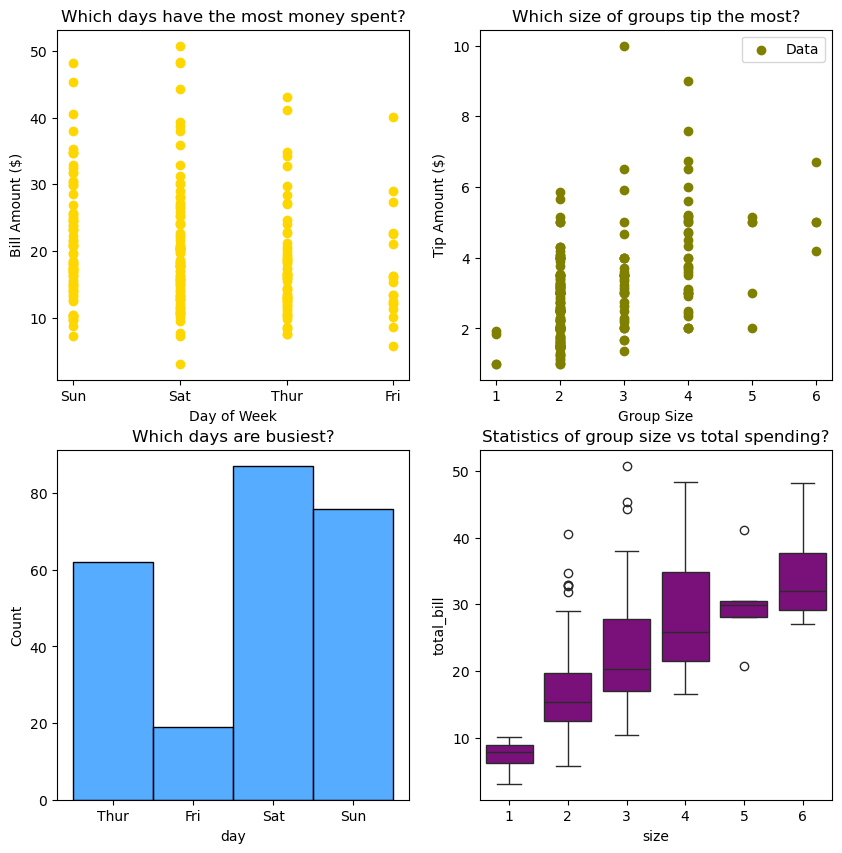

In [88]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
axes[0,0].scatter(x=df2["day"],y=df2["total_bill"],c="gold")
axes[0,1].scatter(x=df2["size"],y=df2["tip"],c="olive",label="Data")
sns.histplot(x=df2["day"],color="dodgerblue",ax=axes[1,0])
sns.boxplot(x=df2["size"],y=df2["total_bill"],color="darkmagenta",ax=axes[1,1])
axes[0,0].set_title("Which days have the most money spent?")
axes[0,1].set_title("Which size of groups tip the most?")
axes[1,0].set_title("Which days are busiest?")
axes[1,1].set_title("Statistics of group size vs total spending?")
axes[0,0].set_xlabel("Day of Week")
axes[0,1].set_xlabel("Group Size")
axes[0,0].set_ylabel("Bill Amount ($)")
axes[0,1].set_ylabel("Tip Amount ($)")
axes[0,1].legend()
plt.show()

In [89]:
#9a) The upper left shows which days have the most money spent.
# Upper right has which size groups tip the most  
# Bottom left has the busiest days
# The bottom right shows how concentrated the spending is for groups of different sizes 

#9b) I learned that fridays are not busy here, and that groups of three tend to tip less.